## Strategies for Immunisation in Inhomogeneous Networks



The below algorithm lays out the set of South African metropoles constructed in a three-tiered network and proportionally distributes vaccinations against COVID-19 according to the city's population size

In [21]:
import numpy as npm
import pandas as pd
import matplotlib.pyplot as plt
import random

In [22]:
df = pd.read_excel("za_areas.xlsx")
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper,area_km2
0,Johannesburg,-26.2044,28.0416,South Africa,ZA,Gauteng,True,4434827,4434827,1645
1,Vereeniging,-26.6736,27.9319,South Africa,ZA,Gauteng,False,1074000,474681,188
2,Pietermaritzburg,-29.5833,30.4167,South Africa,ZA,KwaZulu-Natal,True,750845,490951,126
3,Pretoria,-25.7464,28.1881,South Africa,ZA,Gauteng,True,741651,741651,688
4,Durban,-29.8583,31.0250,South Africa,ZA,KwaZulu-Natal,False,595061,595061,2292


In [23]:
BBox = ((df.lng.min(),   df.lng.max(),      
         df.lat.min(), df.lat.max()))

In [4]:
print(BBox)

(17.9456, 31.4161, -34.4167, -22.3381)


In [5]:
sa_m = plt.imread('map2.png')

In [6]:
size = df['area_km2'].to_numpy() ##### need to change sizes to areas and add colours for population
A = [A for A in size]

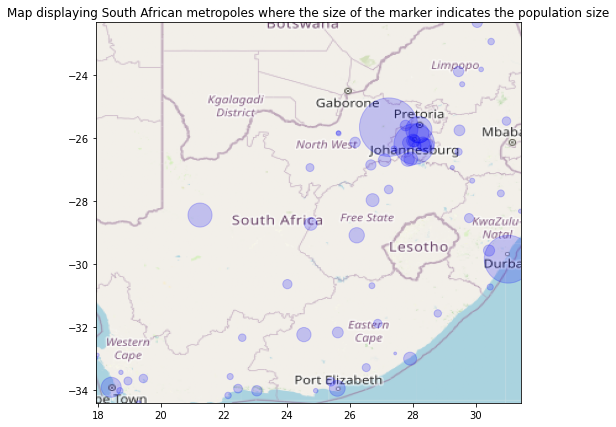

In [27]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df.lng, df.lat, zorder=1, alpha= 0.2, c='b', s=A)
ax.set_title('Map displaying South African metropoles where the size of the marker indicates the population size')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(sa_m, zorder=0, extent = BBox, aspect= 'equal')

In [16]:
#Define characteristics of individuals and population 

population=[]

#For every city make cummulative population 
for index, row in df.iterrows():
    individual = {
        "home_city": row["city"],
        "current_city":row["city"],
        "home_province": row["admin_name"],
        "current_province": row["admin_name"],
        "status": "susceptible",
        "trajectory": [],
        "going_home": False
    }

    population += row["population"]*[individual]

In [17]:
len(population)


15194550

In [18]:
df.columns

Index(['city', 'lat', 'lng', 'country', 'iso2', 'admin_name', 'capital',
       'population', 'population_proper', 'area_km2'],
      dtype='object')

In [19]:
                                                                                    #df[df.capital==True].admin_name
#Storing sets of cities 

# Get capitals
capitals = set(df[df.capital == True].city.tolist())

# Get cities in every province
cities = {}
for p in np.unique(df.admin_name):
    cities[p] = set(df[df.admin_name == p].city.tolist())

In [26]:
#How do we move 1. check if person going home or not
# check if trajectory empty ( trajectory = []), then set "going_home" = False #{use "home_city" instead of "trajectory"}
# 1a.) if they are: follow path and remove next city from trajectory 

# 1b.) if they not: ---> 2.) filter df with the current person's current province, ; if they are
#                            in admin city, add admin cities --> according to some distribution choose city
#3.) assign current province to new city's province, and update trajectory 
#4.) (ONLY IF "going_home" = False :) update "going_home" - if = to some value then set "going_home"= True ----else: randomly assign "going_home"

#0. and 1a)
#if traj is empty then, "going_home" = False

if individual["going_home"]:
    if individual["trajectory"] == []:
        going_home = False
        individual["current_city"] = home_city
        
    else: 
        individual["current_city"] = individual["trajectory"].pop()
        #the above statement returns the last city and updates trajectory to be everything but last city 
        
#1b. ---> 2. filter

else: 
    for p in population: # IN LOOP, move person to new city
        if individual["current_city"] in capitals:
            valid_destination = cities[individual["current_province"]] | capitals
        else:
            valid_destination =  cities[individual["current_province"]]

        # If uniform dist
        individual["current_city"] = random.choice(tuple(valid_destination))
        individual["trajectory"].append(individual["current_city"]) #(step 3.) 
    
    
    

#4                            #with 6 degrees of separation#
#if "trajectory" = 6:
    #"going_home" = True 
#else 
    

In [ ]:
################################################# #SIR# model #####################################################



In [ ]:
######################################### Include Vaccination Data ######################################### 

